# MP4

### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 1. Data wrangling and exploration


### - load and explore the data, clean it, and analyse it by statistics


In [2]:
df = pd.read_csv('./Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1186,35,Yes,Travel_Frequently,880,Sales,12,4,Other,1,1667,...,1,80,0,13,2,4,11,9,6,7
368,40,Yes,Travel_Rarely,575,Sales,22,2,Marketing,1,492,...,1,80,2,8,6,3,6,4,1,0
1314,45,No,Non-Travel,589,Sales,2,4,Life Sciences,1,1845,...,2,80,2,10,3,4,8,7,5,7
888,35,No,Non-Travel,1212,Sales,8,2,Marketing,1,1243,...,2,80,1,16,6,2,13,2,4,12
381,30,No,Travel_Rarely,202,Sales,2,1,Technical Degree,1,508,...,1,80,1,1,3,3,1,0,0,0
1422,35,No,Travel_Rarely,1490,Research & Development,11,4,Medical,1,2003,...,3,80,1,5,3,3,2,2,2,2
866,40,No,Travel_Frequently,1184,Sales,2,4,Medical,1,1212,...,4,80,3,5,2,3,0,0,0,0
1366,39,No,Non-Travel,1251,Sales,21,4,Life Sciences,1,1929,...,3,80,1,10,1,3,3,2,1,2
518,38,No,Travel_Rarely,243,Sales,7,4,Marketing,1,709,...,1,80,0,8,2,3,7,7,0,5
1117,34,No,Travel_Rarely,1351,Research & Development,1,4,Life Sciences,1,1580,...,2,80,1,9,3,2,2,2,2,1


In [3]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
df.shape

(1470, 35)

In [6]:
contains_null = True 
for column in df.isnull().sum():
    if column > 0:
        contains_null = True
        break
    else:
        contains_null = False
print("Does data contain null?:", contains_null)


Does data contain null?: False


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# Keep columns, we think is useful

columns_to_keep = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 
                     'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 
                     'OverTime', 'WorkLifeBalance', 'YearsAtCompany', 'Attrition', ]
df = df[columns_to_keep]

In [9]:
columns = df.columns
dtypes = df.dtypes
print("Columns that are objects:")
for i in range(len(columns)):
    if(dtypes[i] == 'object'):
        print(columns[i], ":", dtypes[i])

Columns that are objects:
BusinessTravel : object
Department : object
OverTime : object
Attrition : object


In [10]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [11]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [12]:
#df['EducationField'].unique()

In [13]:
#df['Gender'].unique()

In [14]:
#df['JobRole'].unique()

In [15]:
#df['MaritalStatus'].unique()

In [16]:
#df['Over18'].unique()

In [17]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

We drop Over18, since the data only has adults

In [18]:
#df.drop(['Over18'], axis=1, inplace=True)

We will use label encoding on all the columns, but gender with object to rank them aswell.

In [19]:
#df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
#df['Department'] = df['Department'].map({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})
#df['OverTime'] = df['OverTime'].map({'No': 0, 'Yes': 1})
#df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

#df['EducationField'] = df['EducationField'].map({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5})
#df['JobRole'] = df['JobRole'].map({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8})
#df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

# One-hot encoding with the gender column
encoded_data = pd.get_dummies(df)
df.reset_index()
df = encoded_data
df.sample(10)


#df.drop(encoded_data.columns, axis=1, inplace=True)
#df.merge(encoded_data)
#df.drop(['Gender'], axis=1, inplace=True)

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,WorkLifeBalance,YearsAtCompany,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,OverTime_No,OverTime_Yes,Attrition_No,Attrition_Yes
643,42,3,3,3,4,4,5231,2,5,False,False,True,False,True,False,False,True,True,False
932,29,7,3,2,3,3,3339,3,7,False,False,True,False,True,False,False,True,False,True
848,35,4,4,4,2,4,2376,4,2,False,True,False,False,True,False,True,False,True,False
1420,41,1,3,4,3,4,2782,3,5,False,False,True,False,True,False,True,False,True,False
1402,31,2,1,4,1,4,1129,3,1,False,False,True,False,True,False,False,True,True,False
948,30,17,4,2,3,1,11916,3,9,False,False,True,False,True,False,False,True,True,False
1326,32,2,4,3,2,2,9907,2,2,False,False,True,False,False,True,False,True,False,True
1309,26,10,3,3,3,4,4684,3,5,False,False,True,False,False,True,True,False,True,False
996,27,10,3,4,2,4,5769,3,6,False,False,True,False,False,True,False,True,True,False
1008,54,1,3,4,3,4,17328,2,20,False,False,True,False,True,False,True,False,True,False


### - select the most relevant features of an employee for machine learning operations on prediction of the attrition

In [20]:
df.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'WorkLifeBalance',
       'YearsAtCompany', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'OverTime_No', 'OverTime_Yes', 'Attrition_No',
       'Attrition_Yes'],
      dtype='object')

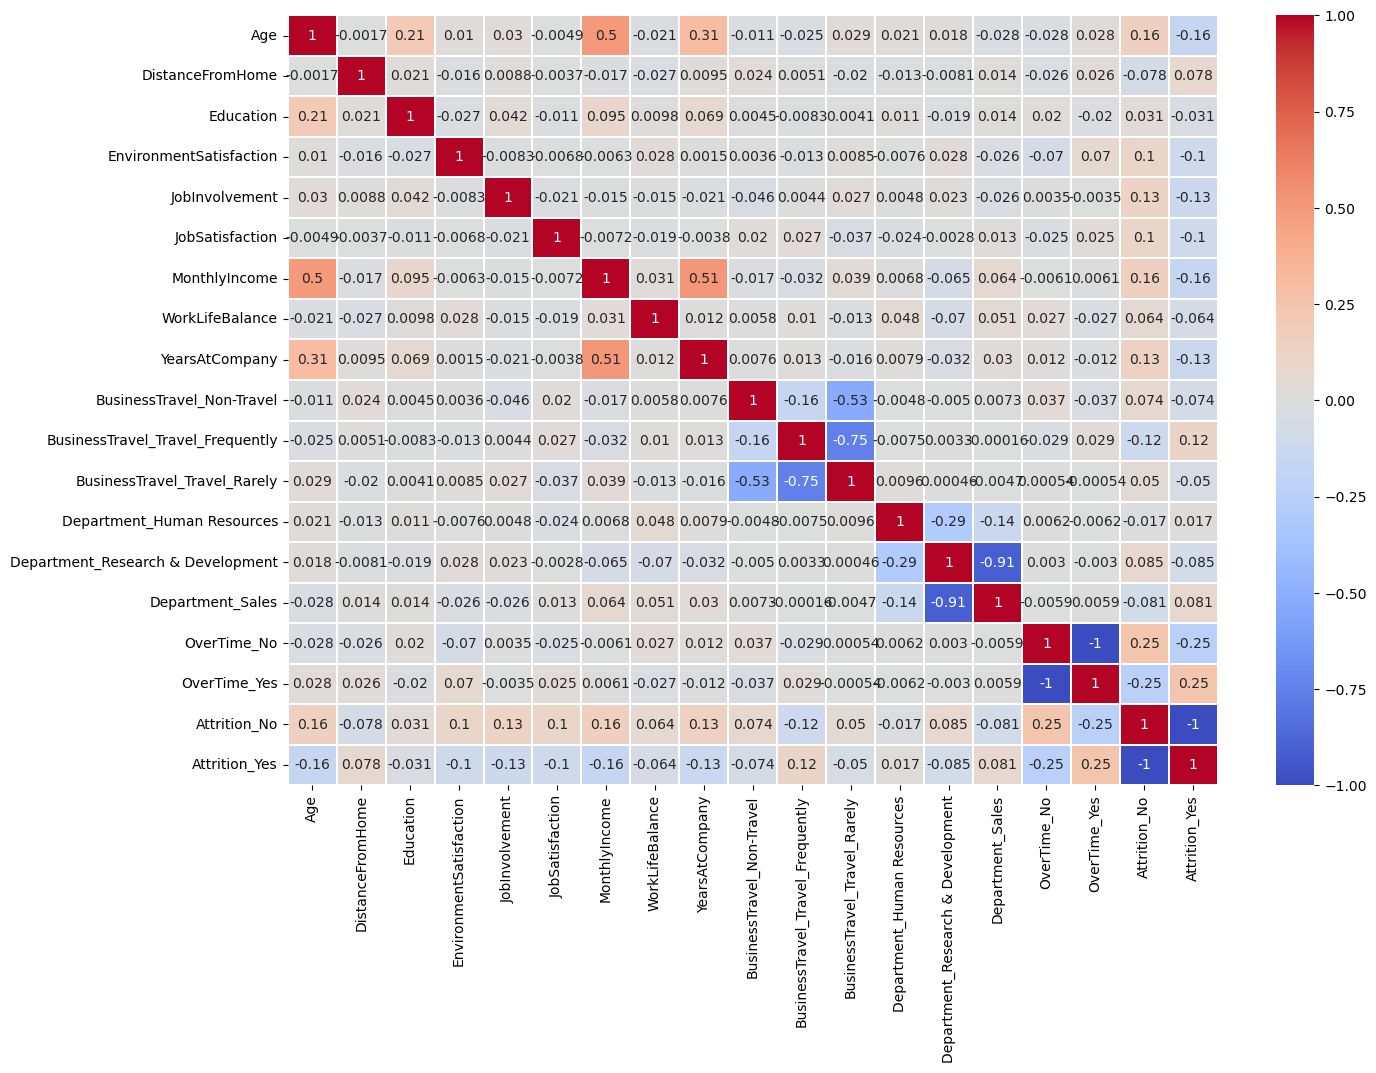

In [21]:
heatmap_data = df.copy()
plt.subplots(figsize=(15,10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.1)

## Questions for Dora

- Is the way we have done encoding correct? We feel like the correlation is not correct, and we are not sure if we should use the label encoding.

# 2. Supervised machine learning: classification


### - train, test, and validate two machine learning models for classification and prediction of attrition (e.g Decision Tree and Naïve Bayes)

### imports

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# Uncomment the following line if you don't have Graphviz installed
#%pip install graphviz
#%conda install python-graphviz
import graphviz

Splitting the data into training and test data

In [23]:
# We removes the Attrition_Yes and Attrition_No columns, because they hold what we want to predict
X = df.drop(['Attrition_Yes', 'Attrition_No', 'OverTime_No'], axis=1)
# For y/what we want to predict, we use only the Attrition_Yes column, because Attrition_No holds same data, but inverted
y = df['Attrition_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'WorkLifeBalance',
       'YearsAtCompany', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'OverTime_Yes'],
      dtype='object')

Train Descision Tree model

In [25]:
params = {'max_depth': 5}
dt_classifier = DecisionTreeClassifier(**params)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [26]:
gr_data = tree.export_graphviz(dt_classifier, 
                               out_file=None, 
                               feature_names=X.columns, 
                               class_names=True, 
                               filled=True, 
                               rounded=True,
                               proportion = False,
                               special_characters=True)
dtree = graphviz.Source(gr_data)

In [27]:
# Export the tree to a pdf file
#dtree.render("./docs/AttritionTree") 

In [28]:
# Show the decision tree
dtree

Error: not well-formed (invalid token) in line 1 
... <HTML>Department_Research & Development &le; 0.5 ...
in label of node 7


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tsvg']' returned non-zero exit status 1. [stderr: 'Error: not well-formed (invalid token) in line 1 \n... <HTML>Department_Research & Development &le; 0.5 ...\nin label of node 7\n']

In [29]:
# Scores the our Descision Tree model against the test data
dt_classifier.score(X_test, y_test)

0.8435374149659864

In [30]:
# try and predict the test data
dt_prediction = dt_classifier.predict(X_test)
dt_prediction

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Train Naive Bayes model

In [31]:
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [58]:
x_train

NameError: name 'x_train' is not defined

In [32]:
# Scores the our Naïve Bayes model against the test data
bayes_classifier.score(X_test, y_test)

0.8775510204081632

In [33]:
# try and predict the test data
bayes_prediction = bayes_classifier.predict(X_test)
bayes_prediction

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,

### - apply appropriate methods and measures for assessing the validity of the models and recommend the one with highest accuracy

In [34]:
# Calculate the accuracy of the models
dt_accuracy = accuracy_score(y_test, dt_prediction)
bayes_accuracy = accuracy_score(y_test, bayes_prediction)
print("Decision Tree Accuracy:", dt_accuracy)
print("Naïve Bayes Accuracy:", bayes_accuracy)

Decision Tree Accuracy: 0.8435374149659864
Naïve Bayes Accuracy: 0.8775510204081632


 With our models, the Decision Tree model has a higher accuracy than the Naive Bayes model. We will in our case recommend the Decision Tree model for predictions.

## 3. Unsupervised machine learning: clustering

### - apply at least one clustering algorithm (e.g. K-Means) for segmentation of the employees in groups of similarity

In [35]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
X = X.astype(float)

distortions = []
K = range(2,10)
for k in K:
    KMeans_model = KMeans(n_clusters=k, n_init=10).fit(X)
    KMeans_model.fit(X)
    sum_ = sum(np.min(cdist(X, KMeans_model.cluster_centers_, 'euclidean'), axis=1)) 
    distortions.append( sum_/ X.shape[0]) 
print("Distortion: ", distortions)

c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with M

Distortion:  [1938.9611681186568, 1338.0653218336065, 879.5438829040003, 726.4804701719311, 566.4578353920767, 505.5759907631259, 439.2086337961554, 376.3707531540804]


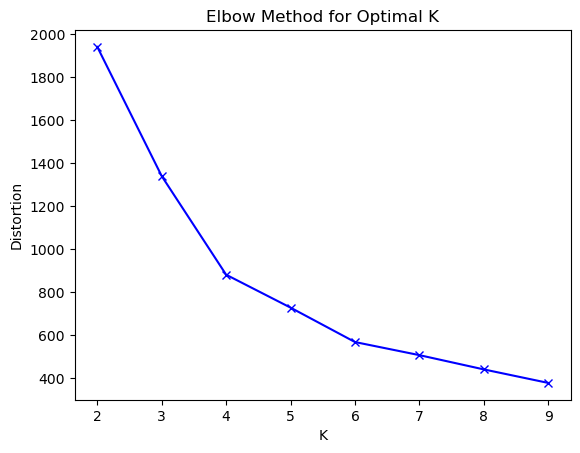

In [36]:
# Plot the distortion to discover the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [37]:
# The optimal number of clusters is 4.
num_clusters = 6

In [38]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [39]:
# Train the KMeans clustering model
kmeans.fit(X)

c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=6, n_init=20)

In [40]:
# Predict 4 clusters in X
y = kmeans.predict(X)
y

array([3, 4, 1, ..., 3, 4, 4])

In [41]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

# same as print(Y)

[3 4 1 ... 3 4 4]


In [42]:
print(kmeans.cluster_centers_)

[[3.96463415e+01 1.00426829e+01 3.01219512e+00 2.76219512e+00
  2.58536585e+00 2.67682927e+00 9.85210366e+03 2.79878049e+00
  9.26219512e+00 8.53658537e-02 2.13414634e-01 7.01219512e-01
  3.04878049e-02 5.00000000e-01 4.69512195e-01 2.68292683e-01]
 [3.26912065e+01 8.79141104e+00 2.73210634e+00 2.72597137e+00
  2.76891616e+00 2.71779141e+00 2.57195297e+03 2.70961145e+00
  3.94069530e+00 9.40695297e-02 1.84049080e-01 7.21881391e-01
  6.13496933e-02 7.81186094e-01 1.57464213e-01 2.80163599e-01]
 [4.47692308e+01 1.05128205e+01 3.05128205e+00 2.55128205e+00
  2.75641026e+00 2.69230769e+00 1.33318846e+04 2.73076923e+00
  1.21153846e+01 1.02564103e-01 2.17948718e-01 6.79487179e-01
  1.28205128e-02 7.30769231e-01 2.56410256e-01 3.71794872e-01]
 [3.70315315e+01 8.98648649e+00 2.99099099e+00 2.74774775e+00
  2.68468468e+00 2.87837838e+00 6.71452703e+03 2.78828829e+00
  7.07657658e+00 1.03603604e-01 1.30630631e-01 7.65765766e-01
  4.05405405e-02 5.09009009e-01 4.50450450e-01 3.10810811e-01]
 [3.

We have found optimal number of clusters to be 4, and we can find the center of them,, but since the are higher than 3D we can't visualize them.

### evaluate the quality of the clustering by calculating a silhouette score and recommend the cluster configuration with higher score


In [43]:
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.7079522630284141


c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 3
Silhouette score = 0.6234224536366229

Number of clusters = 4
Silhouette score = 0.6092808426957064


c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 5
Silhouette score = 0.6154977999855079


c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 6
Silhouette score = 0.6170178009657811

Number of clusters = 7
Silhouette score = 0.6167108796852202


c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 8
Silhouette score = 0.604031734481859


c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(



Number of clusters = 9
Silhouette score = 0.5964014688398395


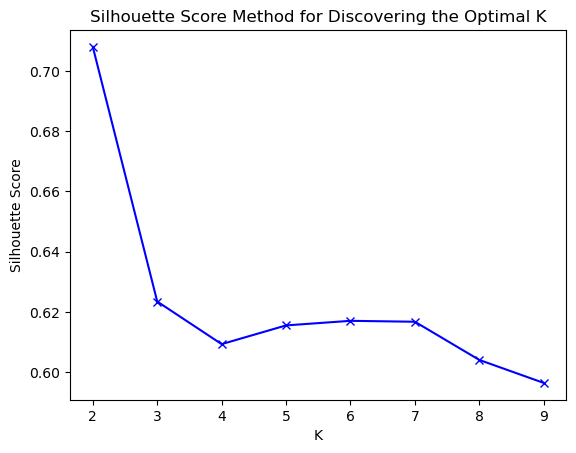

In [44]:
# Plot the elbow
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

If we are going for the best silhouette score, we would recommend 2 clusters, but if we would want more than 2 clusters, we would recommend 7 clusters.

# 4. Machine Learning application

### Notebook page is for the first part of (4) and Attrition is the second part

### - create and deploy on the localhost an interactive prototype of Streamlit application, visualizing stages and results of your work


In [45]:
%pip install streamlit
%pip install streamlit-option-menu
%pip install langdetect
%pip install sweetviz
%pip install --force-reinstall --no-deps bokeh==2.4.3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for bokeh==2.4.3 from https://files.pythonhosted.org/packages/15/06/706a9c43436cd0c3e2f4b94e93ae837e74965e59565c596b727974a74169/bokeh-2.4.3-py3-none-any.whl.metadata
  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
Using cached bokeh-2.4.3-py3-none-any.whl (18.5 MB)
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
Note: you may need to restart the kernel to use updated packages.


In [60]:
!streamlit run ./MiniProject4-Streamlit/app.py

^C


### - enable input of user data and making predictions on attrition by use of the classification model, created in p.2 above

#### Export/deploy Model

In [48]:
import pickle

In [49]:
model_file = './deploy/attrition_model.pkl'

In [50]:
with open(model_file, 'wb') as file:
    pickle.dump(bayes_classifier, file)

#### Test that the model can be loaded and used

In [51]:
# To load it later for reuse
with open(model_file, 'rb') as f:
    test_model = pickle.load(f)

In [52]:
test_model.predict(X_test)

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,

# Notes


### Feel free to replace the original dataset with another one, in support of your exam project, if it is appropriate source of classification and clustering. In that case, you need to formulate alternative questions for answering.Submit a link to the Github repository of your solution, where in the readme file provide answers of the following questions:

### Which machine learning methods did you choose to apply in the application?
- How accurate is your solution of prediction?
- Which are the most decisive factors for quitting a job?
- Which work positions and departments are in higher risk of losing employees?
- Are employees of different gender paid equally in all departments?
- Do the family status and the distance from work influence the work-life balance?
- Does education make people happy (satisfied from the work)?
- Which were the challenges in the project development?
